# CIA Country Analysis and Clustering


Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('../DATA/CIA_Country_Facts.csv')

## Exploratory Data Analysis

In [36]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [38]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


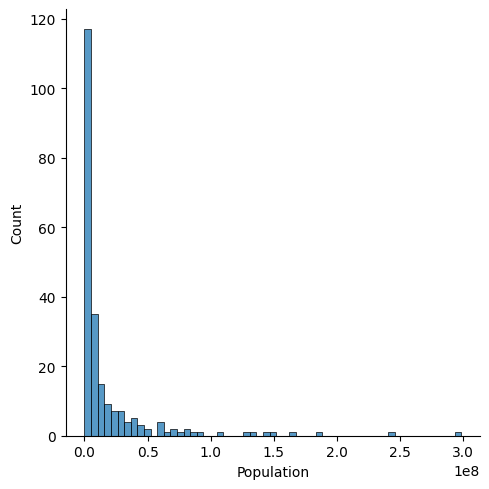

In [39]:
sns.displot(df[df['Population']<0.5*10**9], x='Population');

Creating a bar chart showing the mean GDP per Capita per region

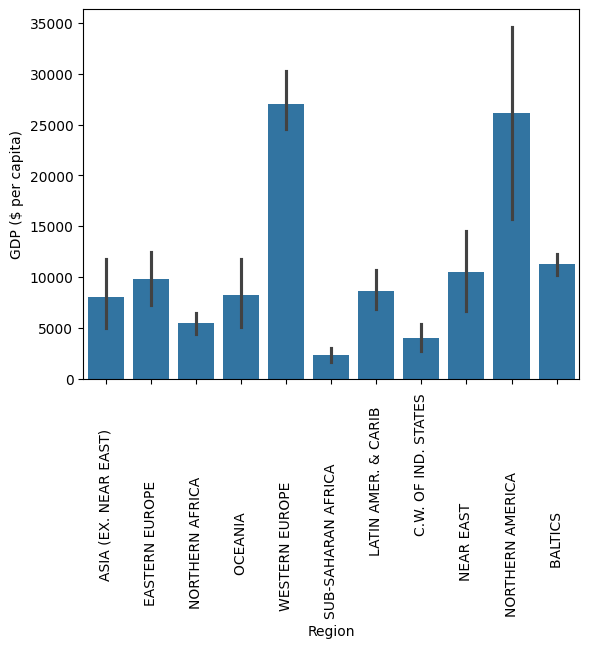

In [40]:
sns.barplot(df, x='Region', y='GDP ($ per capita)')
plt.xticks(rotation=90);

Creating a scatterplot showing the relationship between Phones per 1000 people and the GDP per Capita. The points are colored by Region.

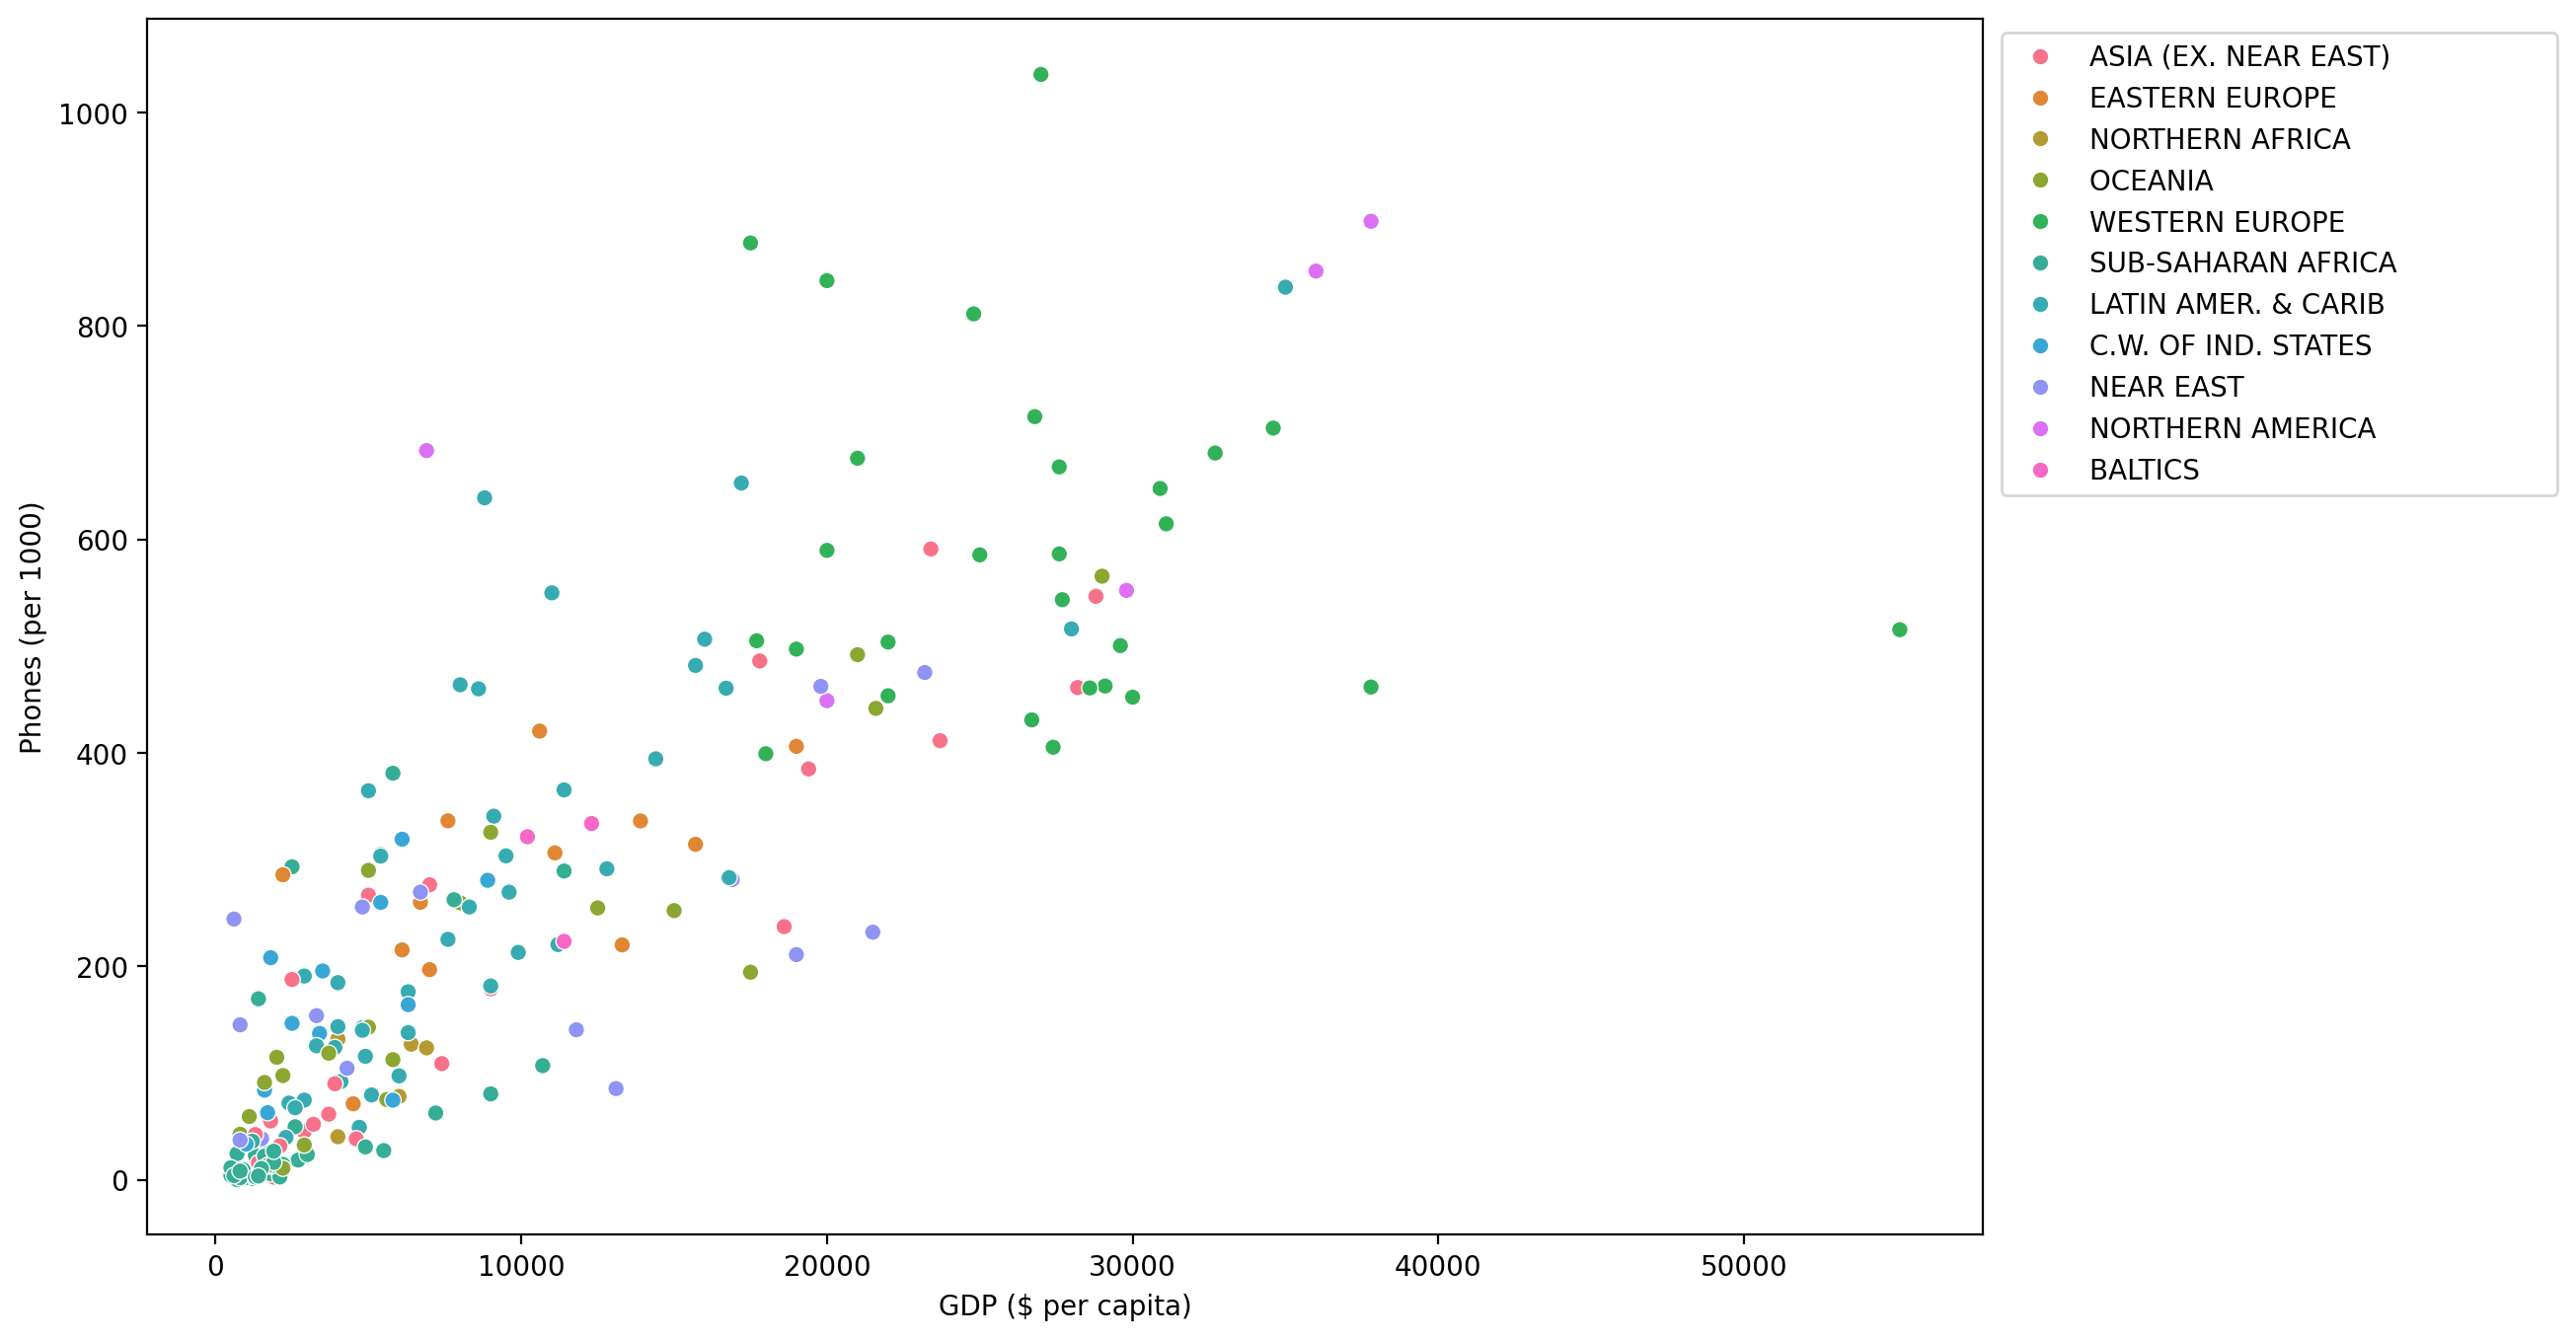

In [41]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(df, y='Phones (per 1000)', x='GDP ($ per capita)', hue='Region')
plt.legend(bbox_to_anchor=(1.32, 1));

Creating a scatterplot showing the relationship between GDP per Capita and Literacy (color the points by Region)

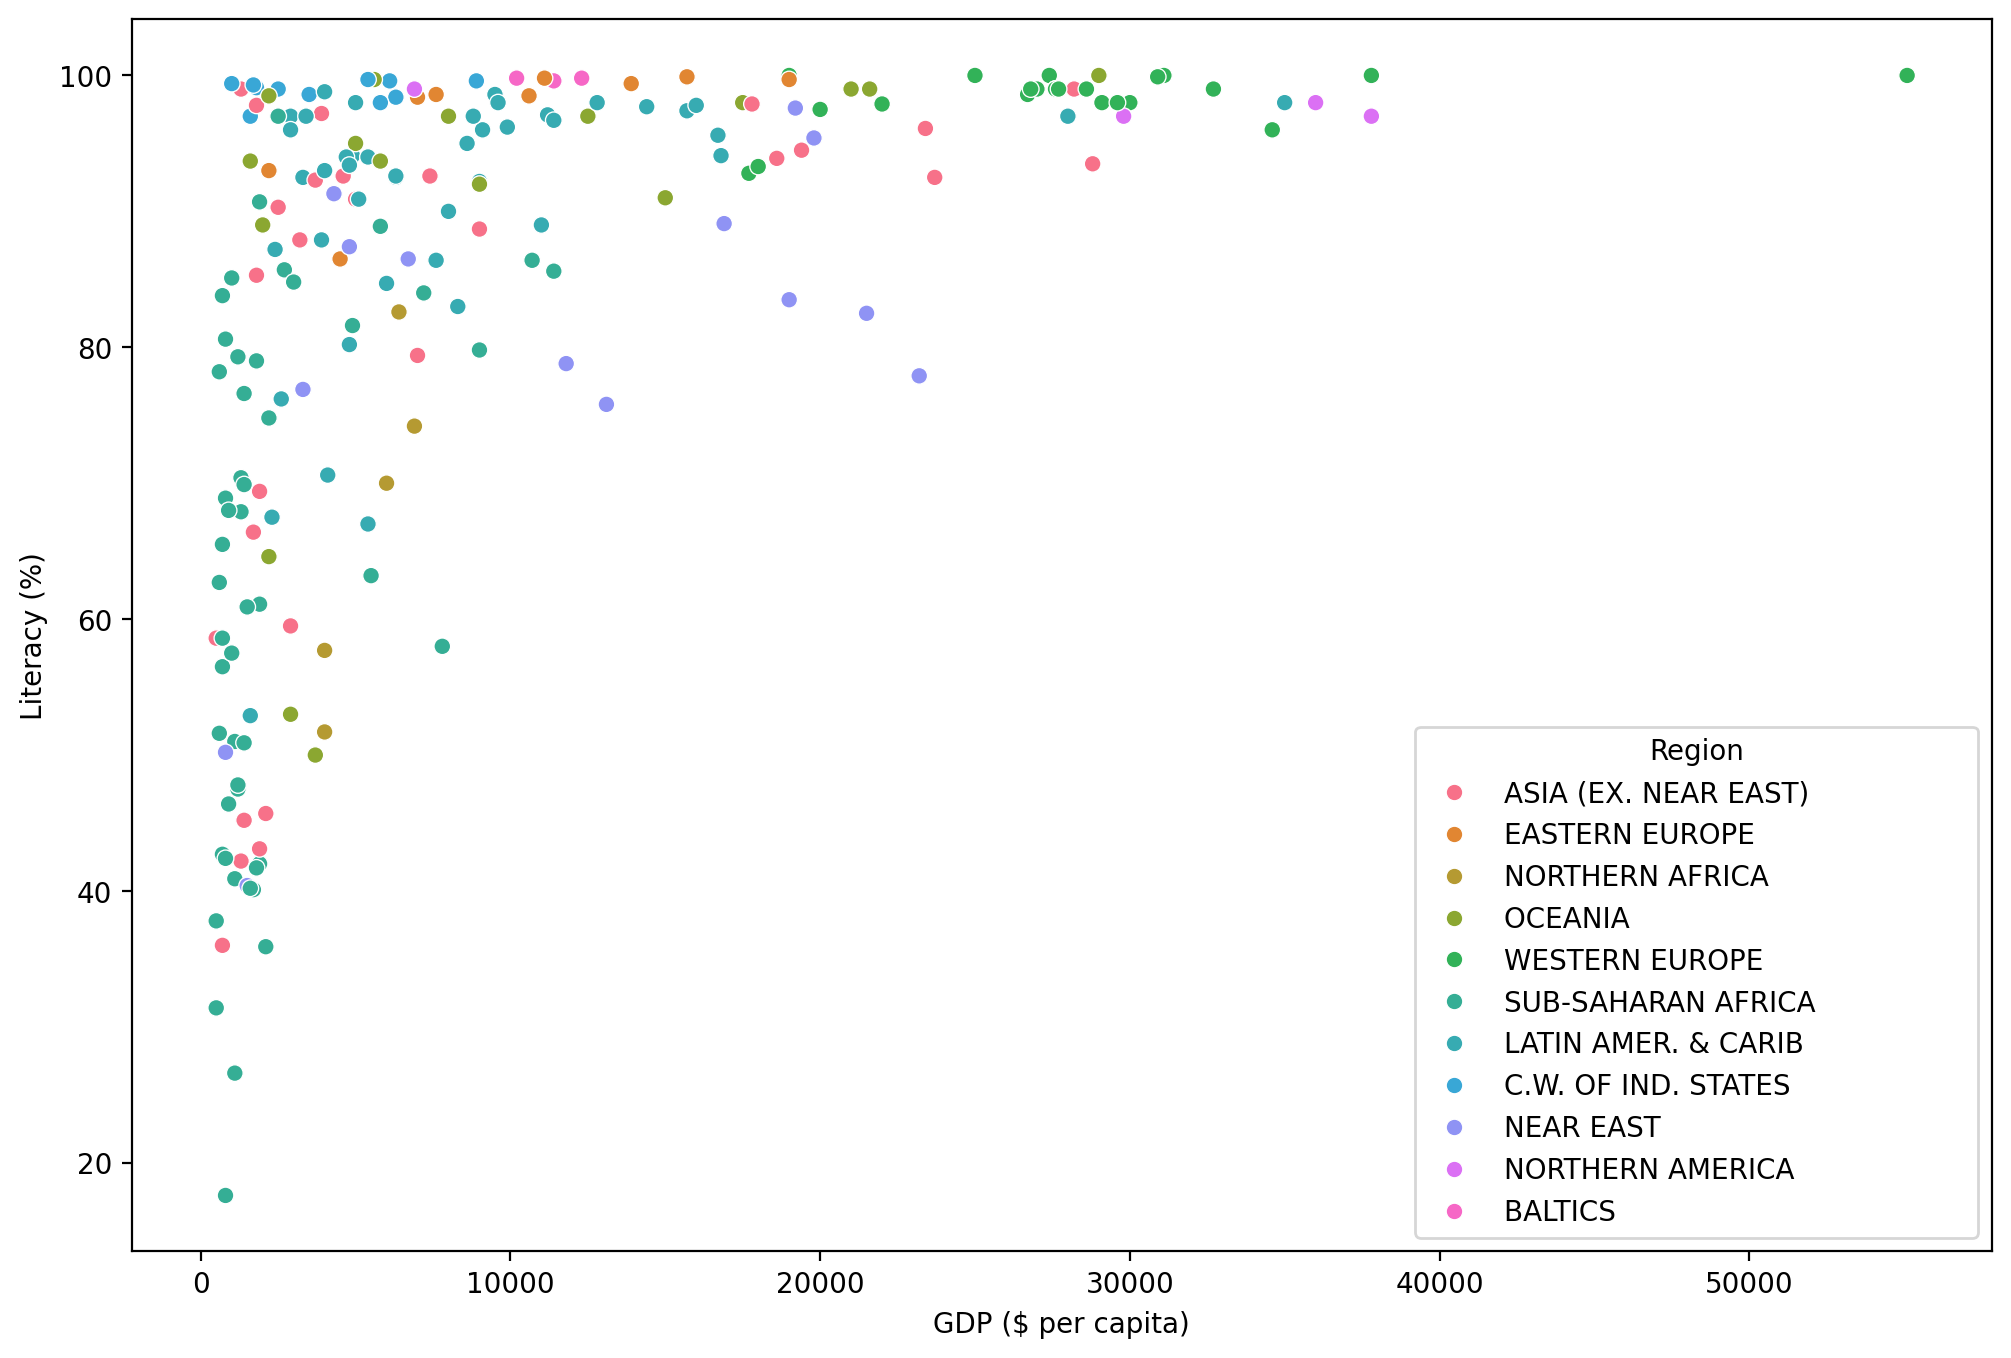

In [42]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(df, x='GDP ($ per capita)', y='Literacy (%)', hue='Region');

Creating a Heatmap of the Correlation between columns in the DataFrame

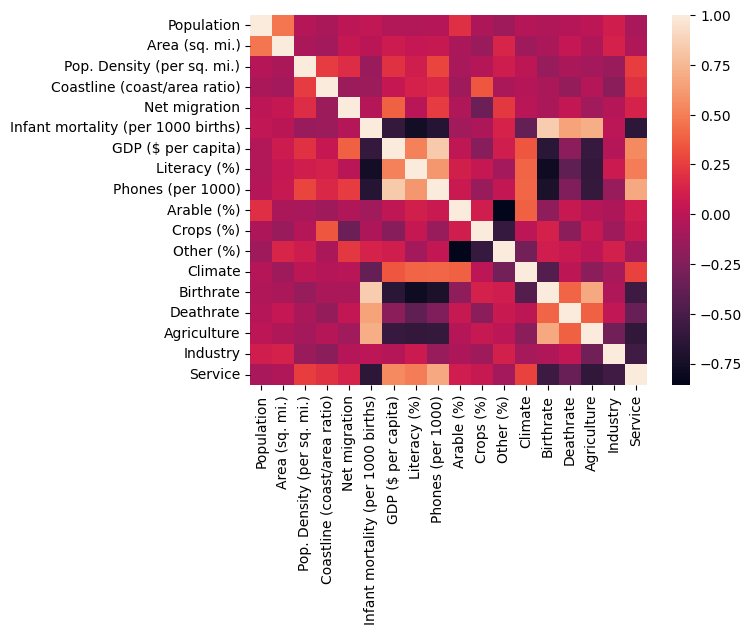

In [43]:
sns.heatmap(df.select_dtypes(include=np.number).corr());

Creating a clustermap of the correlations between each column

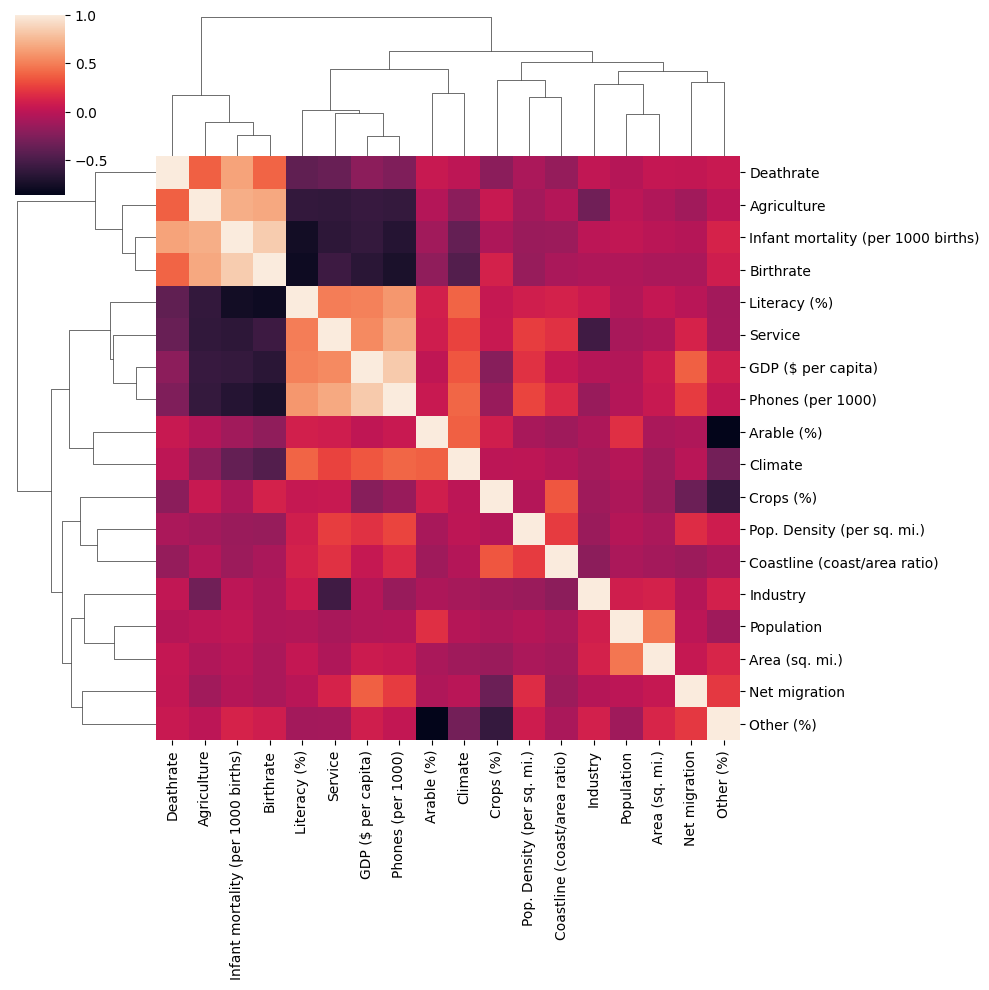

In [44]:
sns.clustermap(df.select_dtypes(include=np.number).corr());

-----

## Data Preparation and Model Discovery

### Missing Data

In [45]:
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

Countries which have NaN for Agriculture

In [46]:
df['Country'][df['Agriculture'].isna()]

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

Most of these countries are tiny islands, with the exception of Greenland and Western Sahara. I will fill these countries missing NaN values with 0, since they are so small or essentially non-existant.
    

In [47]:
df['Agriculture'] = df['Agriculture'].fillna(0)

In [48]:
df['Industry'] = df['Industry'].fillna(0)

In [49]:
df['Service'] = df['Service'].fillna(0)

In [50]:
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                            0
Industry                               0
Service                                0
dtype: int64

Climate is missing for a few countries, but not the Region. I will fill in the missing Climate values based on the mean climate value for its region.

In [51]:
df['Climate'] = df.groupby("Region")['Climate'].transform(lambda x: x.fillna(x.mean()))

In [52]:
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                                0
Birthrate                              3
Deathrate                              4
Agriculture                            0
Industry                               0
Service                                0
dtype: int64

Using the same tactic as I did with Climate missing values and fill in any missing Literacy % values with the mean Literacy % of the Region.

In [53]:
df['Literacy (%)'] = df.groupby("Region")['Literacy (%)'].transform(lambda x: x.fillna(x.mean()))

In [54]:
df.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         3
Infant mortality (per 1000 births)    3
GDP ($ per capita)                    1
Literacy (%)                          0
Phones (per 1000)                     4
Arable (%)                            2
Crops (%)                             2
Other (%)                             2
Climate                               0
Birthrate                             3
Deathrate                             4
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

Data is now missing values for only a few countries. For simplicity, I will drop these.

In [55]:
df = df.dropna()

## Data Feature Preparation

The Country column is still a unique identifier string, so it won't be useful for clustering, since its unique for each point. I will drop this Country column.

In [56]:
X = df.drop('Country', axis=1)

Creating the X array of features

In [57]:
X = pd.get_dummies(df)

In [58]:
X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,False,False,False,False,False,False,False,False,False,False
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,False,False,True,False,False,False,False,False,False,False
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,False,False,False,False,False,True,False,False,False,False
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,False,False,False,False,False,False,False,True,False,False
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,False,False,False,False,False,False,False,False,False,True


### Scaling

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
scaled_X = scaler.fit_transform(X)

### Creating and Fitting Kmeans Model

Using a for loop to create and fit multiple KMeans models, testing from K=2-30 clusters and keeping track of the Sum of Squared Distances for each K value, then plot this out to create an "elbow" plot of K versus SSD.

In [62]:
from sklearn.cluster import KMeans

In [63]:
k_max = 30
ssd = np.zeros(k_max-1)

for k in range(2, k_max+1):
    model = KMeans(n_clusters=k, algorithm='elkan', n_init='auto')
    model.fit(scaled_X)

    ssd[k-2] = model.inertia_ 

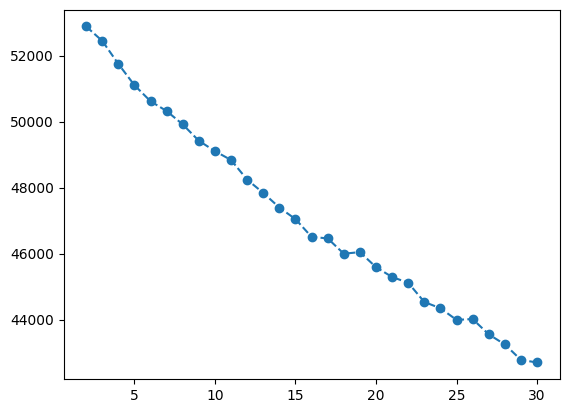

In [64]:
plt.plot(range(2, k_max+1), ssd, '--o')

Creating a bar plot showing the SSD difference from the previous cluster

In [65]:
ssd_diff = pd.DataFrame(ssd).diff().loc[1:]

<Axes: xlabel='None', ylabel='0'>

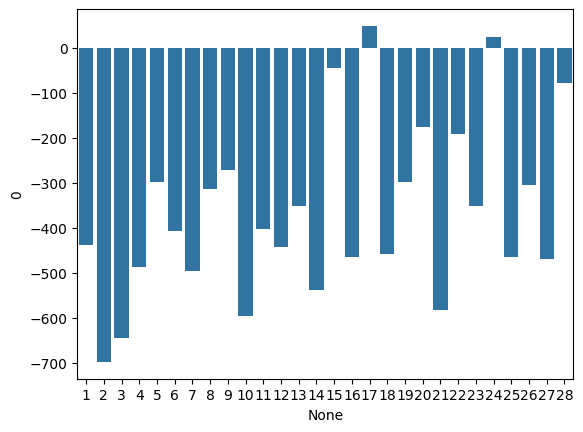

In [66]:
sns.barplot(x=ssd_diff.index, y=ssd_diff[0])

-----


#### Choosing K=3


In [67]:
K = 3

In [68]:
final_model = KMeans(n_clusters=K, algorithm='elkan', n_init='auto')

In [69]:
cluster_labels = final_model.fit_predict(scaled_X)

In [70]:
X['Cluster'] = cluster_labels

In [71]:
X.corr()['Cluster'].sort_values()[:-1]

Region_LATIN AMER. & CARIB                   -0.529613
Crops (%)                                    -0.287350
Region_OCEANIA                               -0.211609
Birthrate                                    -0.210340
Coastline (coast/area ratio)                 -0.124269
                                                ...   
Climate                                       0.316782
Phones (per 1000)                             0.333571
Net migration                                 0.367307
GDP ($ per capita)                            0.478675
Region_WESTERN EUROPE                         0.495142
Name: Cluster, Length: 247, dtype: float64

------------
-------------

## Geographical Model Interpretation

The best way to interpret this model is through visualizing the clusters of countries on a map

In [72]:
import plotly.express as px

In [73]:
iso_codes = pd.read_csv('../DATA/country_iso_codes.csv')

In [74]:
iso_codes = iso_codes.set_index('Country')

In [75]:
iso_codes_dict = iso_codes.to_dict()['ISO Code']

In [76]:
X['iso_alpha'] = df.replace({"Country": iso_codes_dict})["Country"]
X['Country'] = df['Country']

In [77]:
fig = px.choropleth(X, locations='iso_alpha', color='Cluster', hover_name='Country',
                    projection='natural earth')
fig.show()

The resulting clusters resemble a division based on how developed the country is

---